In [8]:
# %conda install statsmodels

In [9]:
%cd /data/jupyter/root/ECNU/DataMining/L09-TimeSeriesPrediction/

/data/jupyter/root/ECNU/DataMining/L09-TimeSeriesPrediction


In [62]:
from __future__ import division
import os, sys

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

%matplotlib inline
import matplotlib.pyplot as plt
from numpy import nan as NA
np.random.seed(12345)
# np.set_printoptions(precision=4)
# plt.rc('figure', figsize=(10, 6))

import warnings
warnings.filterwarnings('ignore')

# 预处理

## 平稳性检验

时序图检验
自相关图检验
单位根检验

## 纯随机检验

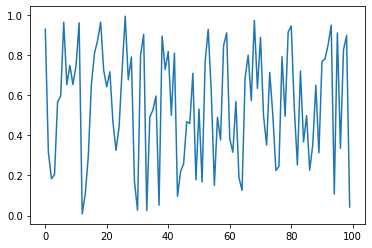

In [35]:
x = np.random.rand(100)
plt.plot(x)

In [36]:
# ADF平稳性检测
from statsmodels.tsa.stattools import adfuller as ADF
ADF(x)
# 可以看到第二个值 < 0.05 认为是平稳的，下一步进行白噪声检测

(-8.783572449968696,
 2.341089864330524e-14,
 0,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 27.59852929294891)

In [37]:
# 白噪声检测
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(x, lags=1)
# 第二个值 > 0.05 不能拒绝纯随机假设，即白噪声，停止分析

(array([1.07734029]), array([0.29929331]))

如果白噪声统计量p值(第二个返回值) < 0.05 则以 95%的置信水平拒绝白噪声假设
那么可以认为为平稳非白噪声序列，适用于ARMA模型

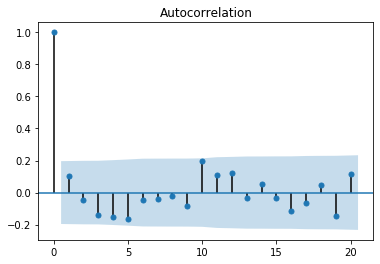

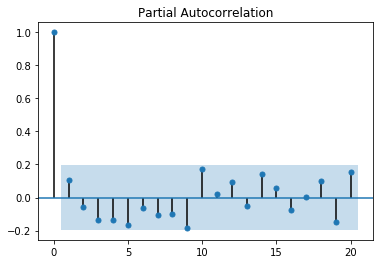

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(x).show() # 自相关图
plot_pacf(x).show() # 偏自相关图

## 平稳序列分析

### AR模型

|  统计量   | 性质  |
|  ----  | ----  |
| ACF  | 拖尾 |
| PACF  | p阶截尾 |

### MA模型

|  统计量   | 性质  |
|  ----  | ----  |
| ACF  | q阶截尾 |
| PACF  | 拖尾 |

### ARMA模型

|  统计量   | 性质  |
|  ----  | ----  |
| ACF  | q阶截尾 |
| PACF  | p阶截尾 |

## 非平稳序列分析

### 差分运算

### ARIMA模型

# 实例1

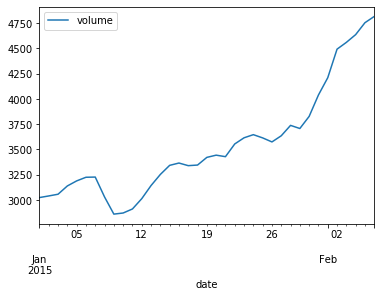

37

In [294]:
data = pd.read_csv('data/arima_data.csv', index_col='date')
# data = data.dropna()
data.index = pd.to_datetime(data.index)
data.plot()
plt.show()
len(data)
# 有明显单调递增，非平稳

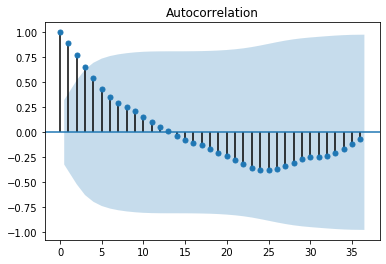

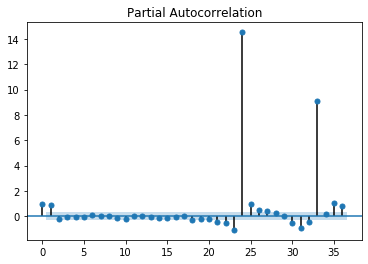

In [88]:
# calculate acf and pcaf

plot_acf(data, lags=len(data)-1).show()
plot_pacf(data, lags=len(data)-1).show()

# acf 长期 > 0 说明长期相关 不是白噪声序列

In [89]:
# adf check
ADF(data['volume'])
# p value > 0.05  非平稳序列(一定不是白噪声序列)


(1.813771015094526,
 0.9983759421514264,
 10,
 26,
 {'1%': -3.7112123008648155,
  '5%': -2.981246804733728,
  '10%': -2.6300945562130176},
 299.4698986602418)

In [90]:
# white noise check
acorr_ljungbox(data['volume'], lags=1)
# p value < 0.05
# not white noise
# 综上 为非平稳序列(非白噪声) 因此接下来用一阶差分 然后进行平稳性和白噪声检测

(array([32.0111333]), array([1.53291527e-08]))

In [93]:
# 1阶差分
D_data = data.diff().dropna()
D_data

,volume
date,
2015-01-02,16.0
2015-01-03,17.0
2015-01-04,82.0
2015-01-05,50.0
2015-01-06,36.0
2015-01-07,2.0
2015-01-08,-197.0
2015-01-09,-170.0
2015-01-10,11.0


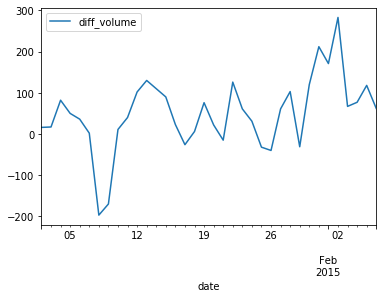

In [95]:
D_data.columns = ['diff_volume']
D_data.plot()
plt.show()

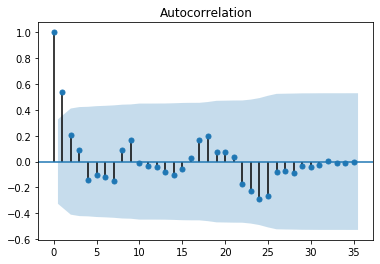

In [107]:
plot_acf(D_data, lags=len(D_data)-1).show()
# 数据呈现收敛趋势，没有拖尾，因此，1阶截尾

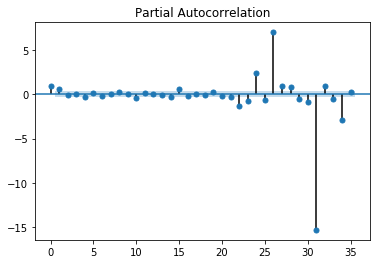

In [109]:
plot_pacf(D_data, lags=len(D_data)-1).show()
# 数据呈现发散趋势，没有截尾，因此，1阶拖尾

In [102]:
ADF(D_data['diff_volume'])

# p value < 0.05 => 平稳序列

(-3.1560562366723537,
 0.022673435440048798,
 0,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 287.5909090780334)

观察：
时序图: 不在是单调，在均值附近波动
ACF：不是长期相关性，很强的短期相关性
因此，平稳序列，下一步做白噪声检测

In [106]:
acorr_ljungbox(D_data['diff_volume'], lags=1)
# p value < 0.05
# 综上 ，差分序列是平稳非白噪声序列 使用ARMA模型

(array([11.30402222]), array([0.00077339]))

## 模型定阶

### 认为识别


1阶差分 acf 为1阶截尾 pacf为1阶拖尾
考虑使用MA(q=1)模型拟合1阶差分序列
即对原始序列建立ARIMA(p,k,q)
p = 0, k = 1, q = 1 => ARIMA(0,1,1)

### 相对最优

暂不理解 BIC 矩阵含义
贝叶斯信息量（BIC）

In [122]:
# 定阶
from statsmodels.tsa.arima_model import ARIMA

pmax = int(len(D_data)/10)
qmax = int(len(D_data)/10)

data['volume'] = data['volume'].astype(float)

bic_mat = []

for p in range(pmax + 1):
    tmp = []
    for q in range(qmax + 1):
        try:
            tmp.append(
                ARIMA(data, (p, 1, q)).fit().bic
            )
        except:
            tmp.append(None)
    bic_mat.append(tmp)
    
bic_mat = pd.DataFrame(bic_mat)
bic_mat
p, q = bic_mat.stack().idxmin()
p, q

(0, 1)

In [128]:
bic_mat

,0,1,2,3
0,432.068472,422.510082,426.088911,426.595507
1,423.628276,426.073601,NaN,NaN
2,426.774824,427.395795,431.003505,NaN
3,430.317524,431.924893,434.761723,436.478109


In [150]:
# 对序列拟合模型进行分析
model = ARIMA(data, (p,1,q)).fit()
resid = model.resid
# resid.values.squeeze()


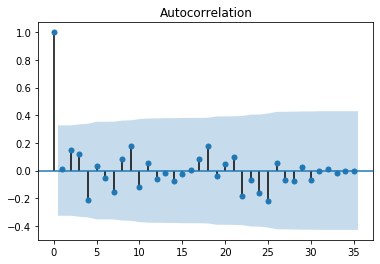

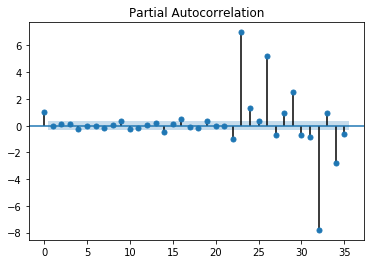

In [142]:
plot_acf(resid.values.squeeze(), lags=35).show()
plot_pacf(resid.values.squeeze(), lags=35).show()

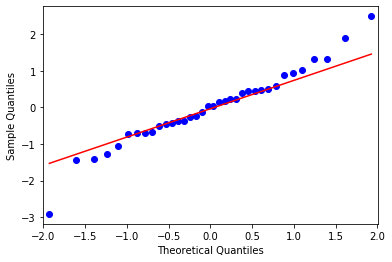

In [144]:
from statsmodels.graphics.api import qqplot
qqplot(resid, line='q', fit=True).show()

In [152]:
acorr_ljungbox(resid, lags=1)
# 白噪声序列

(array([0.00390435]), array([0.95017679]))

In [154]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 422.5101  
Dependent Variable: D.volume         Log-Likelihood:      -205.88   
Date:               2020-01-30 22:43 Scale:               1.0000    
No. Observations:   36               Method:              css-mle   
Df Model:           2                Sample:              01-02-2015
Df Residuals:       34                                    02-06-2015
Converged:          1.0000           S.D. of innovations: 73.086    
No. Iterations:     15.0000          HQIC:                419.418   
AIC:                417.7595                                        
---------------------------------------------------------------------
                   Coef.   Std.Err.    t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const             49.9561   20.1390  2.4806  0.0131  10.4844  89.4279
ma.L1.D.volume     0.6710    0.1648  4.0712  0.0000   0.3480   0.9941
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
MA.1           -1.4902             0.0000           1.4902             0.5000
====================================================================

"""

## ARIMA模型预测

In [156]:
forecastnum = 5 # predicate window
model.forecast(forecastnum)

(array([4873.96659946, 4923.92274066, 4973.87888186, 5023.83502307,
        5073.79116427]),
 array([ 73.08574242, 142.32681105, 187.54283921, 223.80284166,
        254.95706959]),
 array([[4730.72117652, 5017.21202239],
        [4644.96731698, 5202.87816435],
        [4606.30167145, 5341.45609228],
        [4585.18951377, 5462.48053236],
        [4574.08449028, 5573.49783827]]))

In [233]:
pdata = model.forecast(forecastnum, alpha=0.01)[0]
data

,volume
date,
2015-01-01,3023.0
2015-01-02,3039.0
2015-01-03,3056.0
2015-01-04,3138.0
2015-01-05,3188.0
2015-01-06,3224.0
2015-01-07,3226.0
2015-01-08,3029.0
2015-01-09,2859.0


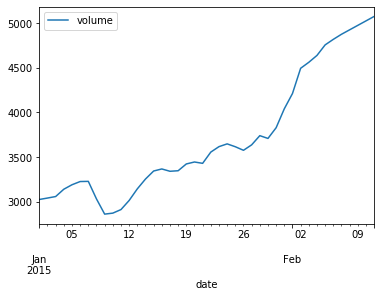

In [297]:
ndata = []
for i, dd in enumerate(pdata):
    ndata.append(["2015-02-" + str(7 +i)  , dd])
ndata = pd.DataFrame(ndata)
ndata.set_index(0, inplace=True)
ndata.index = pd.to_datetime(ndata.index)

ndata.index.name = 'date'
ndata.columns = ['volume']

ndata = data.append(ndata)
ndata.plot()
# ndata.index = pd.to_datetime()

#     data.append(n)
# print(data.iloc[0])
# type(data.iloc[0].name)

# 实例2

In [558]:
import pandas as pd
import numpy as np
from pandas_datareader import data

stock = data.get_data_yahoo('AAPL', start='2016/7/1', end='2016/12/31')
# stock

In [559]:
stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-30,95.769997,94.300003,94.440002,95.599998,35836400.0,90.367195
2016-07-01,96.470001,95.330002,95.489998,95.889999,26026500.0,90.641319
2016-07-05,95.400002,94.459999,95.389999,94.989998,27705200.0,89.790573
2016-07-06,95.660004,94.370003,94.599998,95.529999,30949100.0,90.301018
2016-07-07,96.500000,95.620003,95.699997,95.940002,25139600.0,90.688583
...,...,...,...,...,...,...
2016-12-23,116.519997,115.589996,115.589996,116.519997,14249500.0,111.307320
2016-12-27,117.800003,116.489998,116.519997,117.260002,18296900.0,112.014214
2016-12-28,118.019997,116.199997,117.519997,116.760002,20905900.0,111.536598


In [582]:
out_file = open('data/appl2016-2.csv', 'w')
stock.to_csv(out_file)
out_file.close
# %cat data/appl2016-2.csv

<function TextIOWrapper.close()>

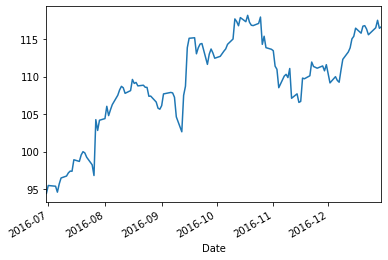

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-30,95.769997,94.300003,94.440002,95.599998,35836400.0,90.367195
2016-07-01,96.470001,95.330002,95.489998,95.889999,26026500.0,90.641319
2016-07-05,95.400002,94.459999,95.389999,94.989998,27705200.0,89.790573
2016-07-06,95.660004,94.370003,94.599998,95.529999,30949100.0,90.301018
2016-07-07,96.500000,95.620003,95.699997,95.940002,25139600.0,90.688583
...,...,...,...,...,...,...
2016-12-23,116.519997,115.589996,115.589996,116.519997,14249500.0,111.307320
2016-12-27,117.800003,116.489998,116.519997,117.260002,18296900.0,112.014214
2016-12-28,118.019997,116.199997,117.519997,116.760002,20905900.0,111.536598


In [585]:
# load data
import pandas as pd

data = pd.read_csv('data/appl2016-2.csv', index_col = 'Date')
data.index = pd.to_datetime(data.index)
data['Open'].plot()
plt.show()
data

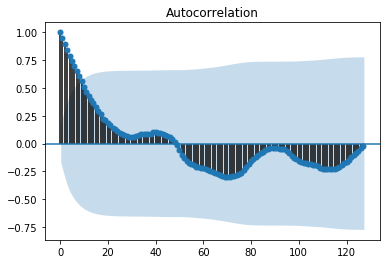

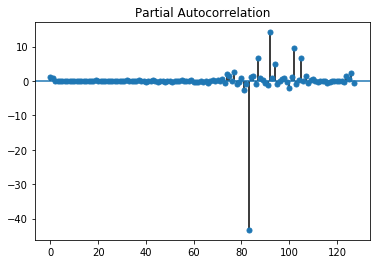

In [586]:
# calculate acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Open'], lags=len(data) -1).show()
plot_pacf(data['Open'], lags=len(data) -1).show()

In [587]:
# adf
ADF(data['Open'])

(-2.193183161680527,
 0.20872887258194878,
 0,
 127,
 {'1%': -3.482920063655088,
  '5%': -2.884580323367261,
  '10%': -2.5790575441750883},
 412.6150501075729)

In [588]:
# white noise
acorr_ljungbox(data['Open'], lags=1)

(array([116.89539636]), array([3.02614415e-27]))

* ADF: p_value = 0.208 > 0.05 非平稳
* WhiteNoise p_value < 0.05 非白噪声

**非平稳序，先进行1阶差分，然后进行平稳性和白噪声**

In [589]:
# 1阶差分
D_data = data['Open'].diff().dropna()
D_data = pd.DataFrame(D_data)
D_data

,Open
Date,
2016-07-01,1.049995
2016-07-05,-0.099998
2016-07-06,-0.790001
2016-07-07,1.099998
2016-07-08,0.790001
...,...
2016-12-23,-0.760002
2016-12-27,0.930000
2016-12-28,1.000000


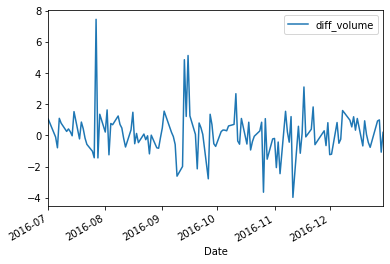

In [590]:
D_data.columns = ['diff_volume']
D_data.plot()
plt.show()


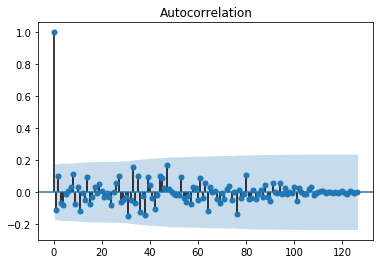

In [591]:
plot_acf(D_data, lags=len(D_data)-1).show()

尾部呈现收敛 => acf 1阶截尾

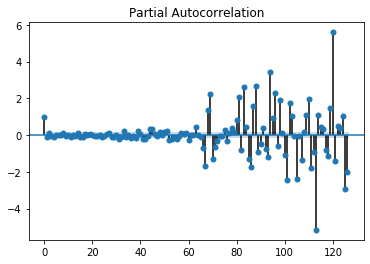

In [592]:
plot_pacf(D_data, lags=len(D_data)-1).show()
# 数据呈现发散趋势，没有截尾，因此，1阶拖尾

In [593]:
ADF(D_data['diff_volume'])
# p_value < 0.05 平稳序列

(-12.46399817167489,
 3.357089307435086e-23,
 0,
 126,
 {'1%': -3.4833462346078936,
  '5%': -2.8847655969877666,
  '10%': -2.5791564575459813},
 413.7702884653162)

In [594]:
acorr_ljungbox(D_data['diff_volume'], lags=1)
# p value > 0.05 认为是纯随机序列
# 停止分析 进行2阶差分

(array([1.5941726]), array([0.206731]))

**二阶差分**

In [595]:
D_data = data['Open'].diff(periods=2).dropna()
D_data = pd.DataFrame(D_data)
D_data

,Open
Date,
2016-07-05,0.949997
2016-07-06,-0.889999
2016-07-07,0.309998
2016-07-08,1.889999
2016-07-11,1.050003
...,...
2016-12-23,-1.210007
2016-12-27,0.169998
2016-12-28,1.930000


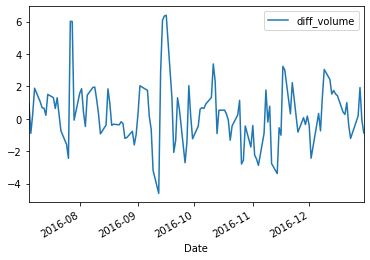

In [596]:
D_data.columns = ['diff_volume']
D_data.plot()
plt.show()


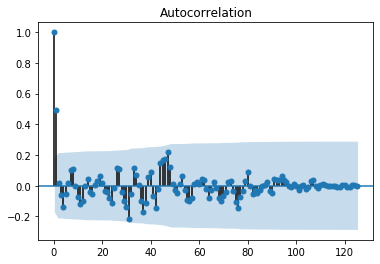

In [597]:
plot_acf(D_data, lags=len(D_data)-1).show()

尾部呈现收敛 => acf 1阶截尾

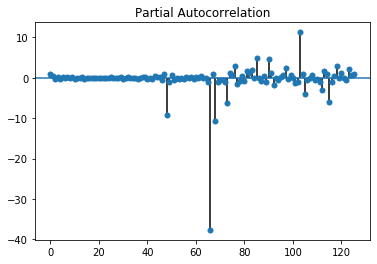

In [598]:
plot_pacf(D_data, lags=len(D_data)-1).show()
# 数据呈现发散趋势，没有截尾，因此，1阶拖尾

In [599]:
ADF(D_data['diff_volume'])
# p_value > 0.05 非平稳序列

(-3.5665371045196235,
 0.006433950890073581,
 7,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 428.58125051361935)

In [600]:
acorr_ljungbox(D_data['diff_volume'], lags=1)
# p value < 0.05 认为是非白噪声序列

(array([31.63447239]), array([1.86096631e-08]))

**三阶差分**

In [601]:
D_data = data['Open'].diff(periods=3).dropna()
D_data = pd.DataFrame(D_data)
D_data

,Open
Date,
2016-07-06,0.159996
2016-07-07,0.209999
2016-07-08,1.099998
2016-07-11,2.150002
2016-07-12,1.470001
...,...
2016-12-23,-1.150002
2016-12-27,-0.280006
2016-12-28,1.169998


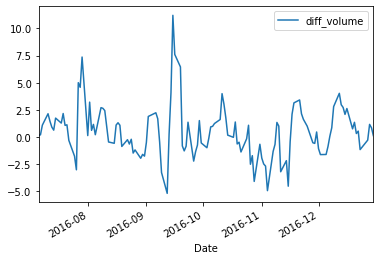

In [602]:
D_data.columns = ['diff_volume']
D_data.plot()
plt.show()


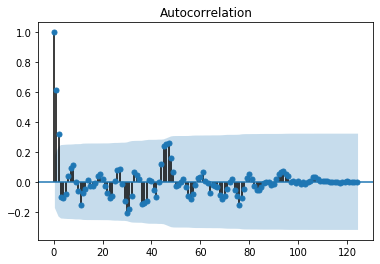

In [603]:
plot_acf(D_data, lags=len(D_data)-1).show()

尾部呈现收敛 => acf 1阶截尾

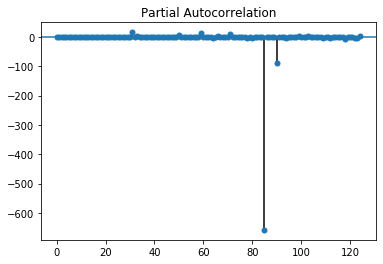

In [604]:
plot_pacf(D_data, lags=len(D_data)-1).show()
# 数据呈现发散趋势，没有截尾，因此，1阶拖尾

In [605]:
ADF(D_data['diff_volume'])
# p_value > 0.05 非平稳序列

(-3.084856705908072,
 0.02769434713010441,
 9,
 115,
 {'1%': -3.4885349695076844,
  '5%': -2.887019521656941,
  '10%': -2.5803597920604915},
 438.50911152404615)

In [606]:
acorr_ljungbox(D_data['diff_volume'], lags=1)
# p value < 0.05 认为是非白噪声序列

(array([48.48062159]), array([3.33568816e-12]))

**定阶**

In [607]:
# 定阶
from statsmodels.tsa.arima_model import ARIMA

# pmax = int(len(D_data)/10)
# qmax = int(len(D_data)/10)

pmax = 3
qmax = 3

data['Open'] = data['Open'].astype(float)

bic_mat = []

for p in range(pmax + 1):
    tmp = []
    for q in range(qmax + 1):
        try:
            tmp.append(
                ARIMA(data['Open'], (p, 2, q)).fit().bic
            )
        except:
            tmp.append(None)
    bic_mat.append(tmp)
    
bic_mat = pd.DataFrame(bic_mat)
bic_mat
p, q = bic_mat.stack().idxmin()
p, q

(0, 1)

In [608]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-30,95.769997,94.300003,94.440002,95.599998,35836400.0,90.367195
2016-07-01,96.470001,95.330002,95.489998,95.889999,26026500.0,90.641319
2016-07-05,95.400002,94.459999,95.389999,94.989998,27705200.0,89.790573
2016-07-06,95.660004,94.370003,94.599998,95.529999,30949100.0,90.301018
2016-07-07,96.500000,95.620003,95.699997,95.940002,25139600.0,90.688583
...,...,...,...,...,...,...
2016-12-23,116.519997,115.589996,115.589996,116.519997,14249500.0,111.307320
2016-12-27,117.800003,116.489998,116.519997,117.260002,18296900.0,112.014214
2016-12-28,118.019997,116.199997,117.519997,116.760002,20905900.0,111.536598


In [609]:
train = data[:-5]['Open']
test = data[-5:]['Open']

model = ARIMA(train, (p, 1, q)).fit()
yHat = model.forecast(len(test), alpha=0.01)
# yHat[0]

In [610]:
# test

In [611]:
ped = yHat[0]
ped = pd.Series(ped, index = test.index)
ped

Date
2016-12-23    116.587846
2016-12-27    116.767283
2016-12-28    116.946720
2016-12-29    117.126157
2016-12-30    117.305594
dtype: float64

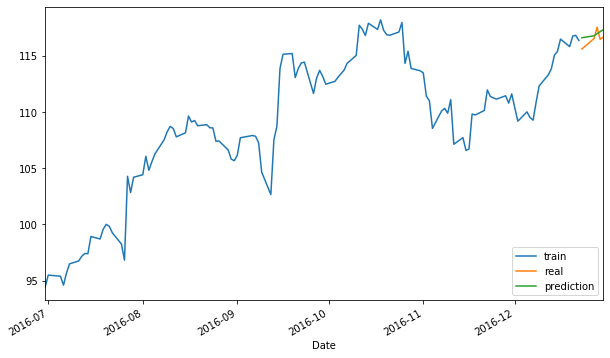

In [612]:
# data['Open'].plot()
plt.figure(figsize=(10,6))
train.plot(label='train')
test.plot(label='real')
ped.plot(label='prediction')
plt.legend(loc=4)

In [613]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ped, test)

0.4544986953493931

In [614]:
np.sqrt((test-ped)**2).sum()/len(test)

0.6300328917325515

In [616]:
abs(test-ped).sum()/len(test)

0.6300328917325515

# 实例3

,sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587
...,...
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342


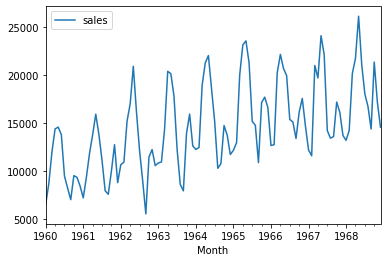

In [618]:
data = pd.read_csv('data/car-sales.csv', header=0, index_col='Month')
data.index = pd.to_datetime(data.index)

data.columns = ['sales']
data.plot()
data

,sales
Month,
1961-01-01,687.0
1961-02-01,646.0
1961-03-01,-189.0
1961-04-01,-611.0
1961-05-01,1339.0
...,...
1968-08-01,3288.0
1968-09-01,787.0
1968-10-01,4155.0


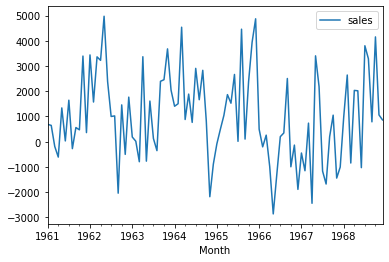

In [621]:
# 季节性适配时间序列
D_data = data.diff(12).dropna()
D_data.to_csv('data/seasonally.csv')
D_data.plot()
D_data

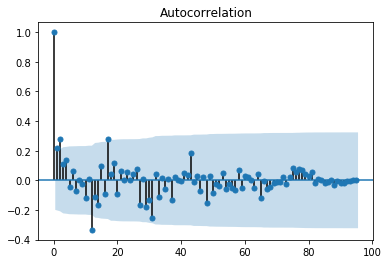

In [625]:
plot_acf(D_data, lags=len(D_data) -1).show()

In [646]:
# 12个月滞后值
S_data = pd.DataFrame()
for i in range(12,0,-1):
    
    S_data['t-'+str(i)] = D_data['sales'].shift(i)
S_data
# print(D_data['sales'].shift(4))
S_data['t'] = D_data.values
S_data = S_data[13:]
S_data

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
Month,,,,,,,,,,,,,
1962-02-01,646.0,-189.0,-611.0,1339.0,30.0,1645.0,-276.0,561.0,470.0,3395.0,360.0,3440.0,1573.0
1962-03-01,-189.0,-611.0,1339.0,30.0,1645.0,-276.0,561.0,470.0,3395.0,360.0,3440.0,1573.0,3363.0
1962-04-01,-611.0,1339.0,30.0,1645.0,-276.0,561.0,470.0,3395.0,360.0,3440.0,1573.0,3363.0,3226.0
1962-05-01,1339.0,30.0,1645.0,-276.0,561.0,470.0,3395.0,360.0,3440.0,1573.0,3363.0,3226.0,4974.0
1962-06-01,30.0,1645.0,-276.0,561.0,470.0,3395.0,360.0,3440.0,1573.0,3363.0,3226.0,4974.0,2384.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968-08-01,-1679.0,197.0,1052.0,-1443.0,-1007.0,985.0,2643.0,-846.0,2033.0,2018.0,-1030.0,3804.0,3288.0
1968-09-01,197.0,1052.0,-1443.0,-1007.0,985.0,2643.0,-846.0,2033.0,2018.0,-1030.0,3804.0,3288.0,787.0
1968-10-01,1052.0,-1443.0,-1007.0,985.0,2643.0,-846.0,2033.0,2018.0,-1030.0,3804.0,3288.0,787.0,4155.0


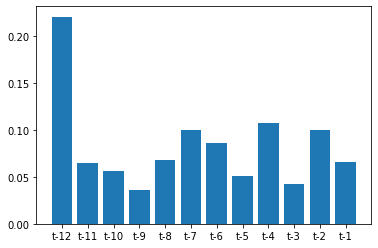

In [651]:
# 滞后观察者的重要性得分
from sklearn.ensemble import RandomForestRegressor
X = S_data.values[:,0:-1]
y = S_data.values[:,-1]
model = RandomForestRegressor(n_estimators=50, random_state=1)
model.fit(X, y)
model.feature_importances_

names = S_data.columns.values[0:-1]
ticks = [i for i in range(len(names))]

plt.bar(ticks, model.feature_importances_)
plt.xticks(ticks, names)
plt.show()

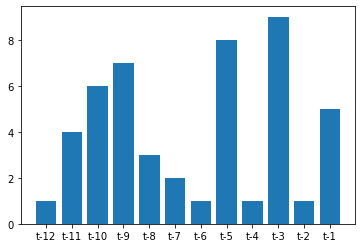

In [656]:
# RFE预测
from sklearn.feature_selection import RFE
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4)
fit = rfe.fit(X, y)

plt.bar(ticks, fit.ranking_)
plt.xticks(ticks, names)
plt.show()

In [659]:
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])

t-12
t-6
t-4
t-2


In [661]:
model = ARIMA(D_data, (7,0,0)).fit(trend='nc', disp=0)
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 1737.5227 
Dependent Variable: sales            Log-Likelihood:      -850.50   
Date:               2020-02-01 23:42 Scale:               1.0000    
No. Observations:   96               Method:              css-mle   
Df Model:           7                Sample:              01-01-1961
Df Residuals:       89                                    12-01-1968
Converged:          1.0000           S.D. of innovations: 1698.179  
No. Iterations:     8.0000           HQIC:                1725.300  
AIC:                1717.0079                                       
----------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
----------------------------------------------------------------------
ar.L1.sales    0.2395     0.1013    2.3635   0.0181    0.0409   0.4381
ar.L2.sales    0.2635     0.1034    2.5486   0.0108    0.0609   0.4662
ar.L3.sales    0.0748     0.1080    0.6926   0.4886   -0.1368   0.2864
ar.L4.sales    0.1022     0.1076    0.9496   0.3423   -0.1087   0.3132
ar.L5.sales   -0.0856     0.1085   -0.7885   0.4304   -0.2983   0.1271
ar.L6.sales    0.1188     0.1066    1.1139   0.2653   -0.0902   0.3278
ar.L7.sales   -0.0118     0.1058   -0.1112   0.9114   -0.2191   0.1956
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -1.2531            -0.0000           1.2531            -0.5000
AR.2           -0.6279            -1.2957           1.4399            -0.3218
AR.3           -0.6279             1.2957           1.4399             0.3218
AR.4            1.1554            -0.0000           1.1554            -0.0000
AR.5            1.0082            -1.4090           1.7326            -0.1511
AR.6            1.0082             1.4090           1.7326             0.1511
AR.7            9.4317            -0.0000           9.4317            -0.0000
====================================================================

"""

In [662]:
train, test = D_data[D_data.index < '1968'], D_data['1968']
years = [
    '1967',
    '1966',
    '1965',
    '1964',
    '1963',
    '1962',
    '1961',
]

In [666]:
rmseList = list()
for year in years:
    dataset = train[train.index >=year]
    
    values = dataset.values
    history = [values[i] for i in range(len(values))]
    predictions = list()
    test_values = test.values
    for t in range(len(test_values)):
        model = ARIMA(history, order=(1,0,0)).fit(trainend='nc', disp=0)
        yhat = model.forecast()[0]
        predictions.append(yhat)
        history.append(test_values[t])
    rmse = np.sqrt((test_values - predictions)**2).sum()/len(test_values)
    rmseList.append(rmse)

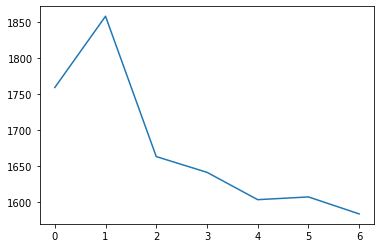

In [670]:
plt.plot(rmseList)